## 0. Install and Import Dependencies

In [1]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.2MB 48kB/s 


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow


## 1. Read in Image, Grayscale and Blur

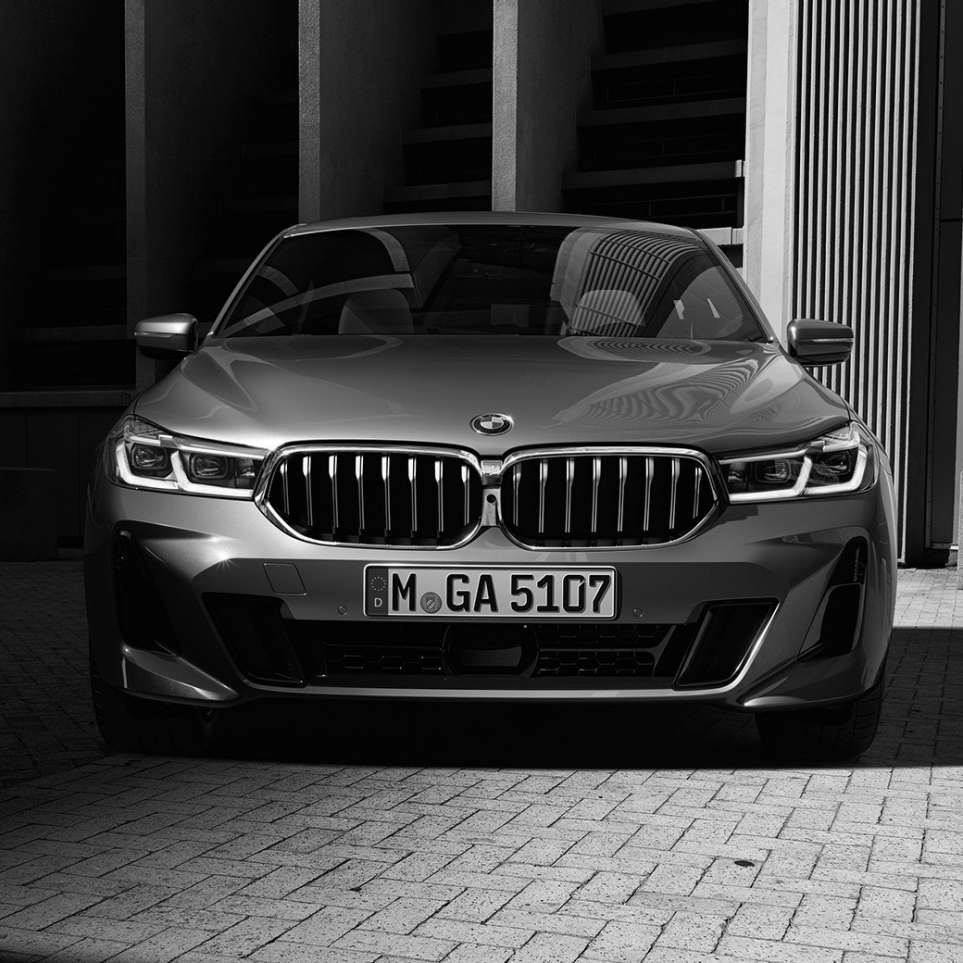

In [3]:
img = cv2.imread('bmw.jpg') #讀入圖像，灰度和模糊
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

## 2. Apply filter and find edges for localization

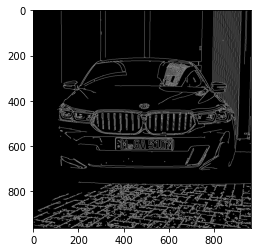

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction 降噪
edged = cv2.Canny(bfilter, 30, 200) #Edge detection 邊緣檢測
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #查找輪廓並應用遮罩
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[388, 569]],

       [[612, 570]],

       [[613, 614]],

       [[389, 615]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

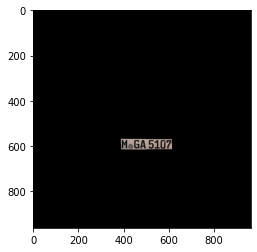

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

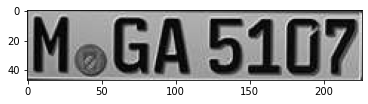

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [12]:
reader = easyocr.Reader(['en']) #使用簡易OCR讀取文本
result = reader.readtext(cropped_image)
result

[([[0, 0], [226, 0], [226, 47], [0, 47]], 'MoGA 5107', 0.9735592195069914)]

## 5. Render Result

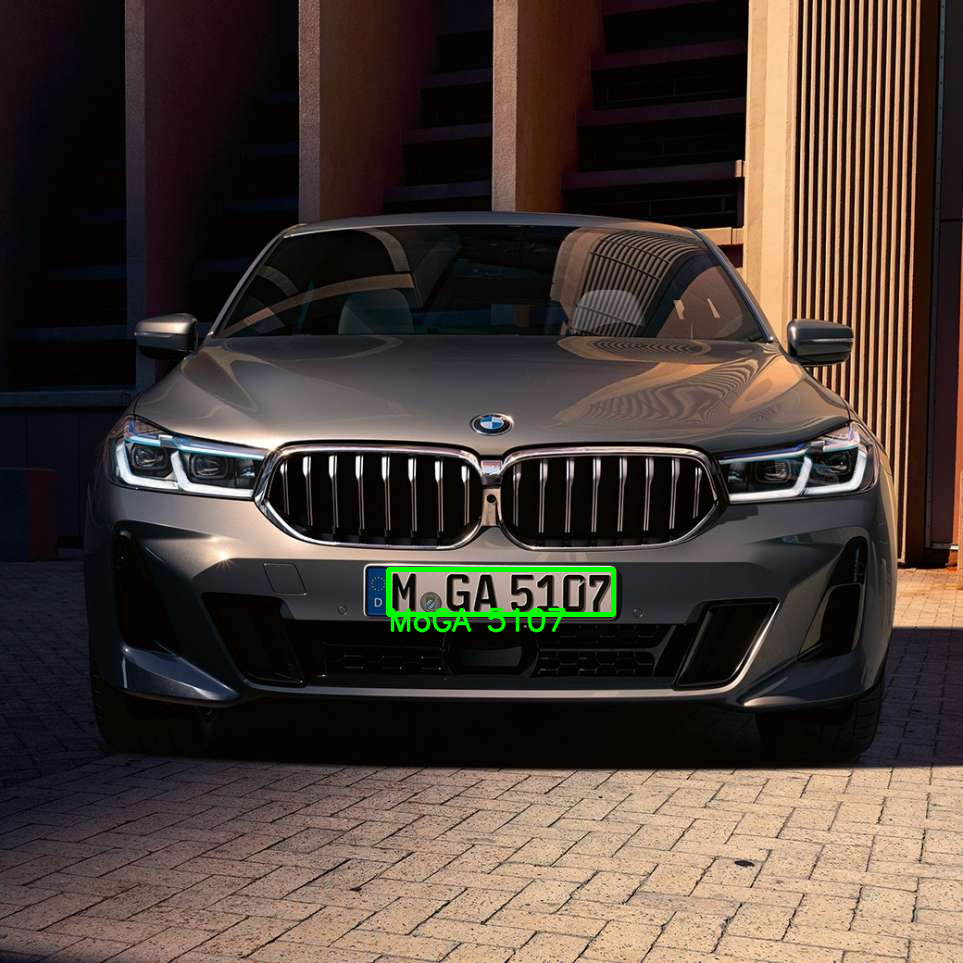

In [13]:
text = result[0][-2] #渲染結果
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2_imshow(res)